# Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load data 
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


# Data Wrangling

In [3]:
df.rename(columns={'Reason for absence':'Absence_reason', 'Month of absence':'Absence_month', 
                   'Day of the week':'Absence_day', 'Transportation expense':'Transportation_expense', 
                   'Distance from Residence to Work':'Distance_residence_work', 'Service time':'Service_time',
                   'Work load Average/day': 'Average_work_load_per_day', 'Hit target':'Hit_target', 
                   'Disciplinary failure':'Disciplinary_failure', 'Son':'Number_children', 
                   'Social drinker':'Social_drinker', 'Social smoker':'Social_smoker', 'Pet':'Number_pet',
                   'Body mass index':'Body_mass_index', 'Absenteeism time in hours':'Hours_Absent'}, inplace=True)
df.head()

,ID,Absence_reason,Absence_month,Absence_day,Seasons,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,...,Disciplinary_failure,Education,Number_children,Social_drinker,Social_smoker,Number_pet,Weight,Height,Body_mass_index,Hours_Absent
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       740 non-null    int64  
 1   Absence_reason           740 non-null    int64  
 2   Absence_month            740 non-null    int64  
 3   Absence_day              740 non-null    int64  
 4   Seasons                  740 non-null    int64  
 5   Transportation_expense   740 non-null    int64  
 6   Distance_residence_work  740 non-null    int64  
 7   Service_time             740 non-null    int64  
 8   Age                      740 non-null    int64  
 9   Work load Average/day    740 non-null    float64
 10  Hit_target               740 non-null    int64  
 11  Disciplinary_failure     740 non-null    int64  
 12  Education                740 non-null    int64  
 13  Number_children          740 non-null    int64  
 14  Social_drinker           7

In [5]:
df.nunique()

ID                         36
Absence_reason             28
Absence_month              13
Absence_day                 5
Seasons                     4
Transportation_expense     24
Distance_residence_work    25
Service_time               18
Age                        22
Work load Average/day      38
Hit_target                 13
Disciplinary_failure        2
Education                   4
Number_children             5
Social_drinker              2
Social_smoker               2
Number_pet                  6
Weight                     26
Height                     14
Body_mass_index            17
Hours_Absent               19
dtype: int64

In [4]:
#Create reason for Absence description column
Absence_reason_description = {1:'Certain infectious and parasitic diseases', 
                              2:'Neoplasms',
                              3:'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
                              4:'Endocrine, nutritional and metabolic diseases',
                              5:'Mental and behavioral disorders',
                              6:'Diseases of the nervous system',
                              7:'Diseases of the eye and adnexa',
                              8:'Diseases of the ear and mastoid process',
                              9:'Diseases of the circulatory system',
                              10:'Diseases of the respiratory system',
                              11:'Diseases of the digestive system',
                              12:'Diseases of the skin and subcutaneous tissue',
                              13:'Diseases of the musculoskeletal system and connective tissue',
                              14:'Diseases of the genitourinary system',
                              15:'Pregnancy, childbirth and the puerperium',
                              16:'Certain conditions originating in the perinatal period',
                              17:'Congenital malformations, deformations and chromosomal abnormalities',
                              18:'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
                              19:'Injury, poisoning and certain other consequences of external causes',
                              20:'External causes of morbidity and mortality',
                              21:'Factors influencing health status and contact with health services',
                              22:'patient follow-up',
                              23:'medical consultation',
                              24:'blood donation',
                              25:'laboratory examination',
                              26:'unjustified absence',
                              27:'physiotherapy',
                              28:'dental consultation'}

In [5]:
df['Absence_reason_description']=df['Absence_reason'].map(Absence_reason_description)

In [6]:
#Create description columns for months, days and education
Month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
      7:'July', 8:'August', 9:'September', 10:'October', 11:'November',
      12:'December'}
Day = {2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
Education = {1:'high school', 2:'graduate', 3:'postgraduate', 4:'master and doctor'}
Season = {1:'Winter', 2:'Summer', 3:'Fall', 4:'Spring'}

In [7]:
df['Absence_month_description']=df['Absence_month'].map(Month)
df['Absence_day_description']=df['Absence_day'].map(Day)
df['Education_description']=df['Education'].map(Education)
df['Seasons_description']=df['Seasons'].map(Season)

df.head()

,ID,Absence_reason,Absence_month,Absence_day,Seasons,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,...,Number_pet,Weight,Height,Body_mass_index,Hours_Absent,Absence_reason_description,Absence_month_description,Absence_day_description,Education_description,Seasons_description
0,11,26,7,3,1,289,36,13,33,239.554,...,1,90,172,30,4,unjustified absence,July,Tuesday,high school,Winter
1,36,0,7,3,1,118,13,18,50,239.554,...,0,98,178,31,0,NaN,July,Tuesday,high school,Winter
2,3,23,7,4,1,179,51,18,38,239.554,...,0,89,170,31,2,medical consultation,July,Wednesday,high school,Winter
3,7,7,7,5,1,279,5,14,39,239.554,...,0,68,168,24,4,Diseases of the eye and adnexa,July,Thursday,high school,Winter
4,11,23,7,5,1,289,36,13,33,239.554,...,1,90,172,30,2,medical consultation,July,Thursday,high school,Winter


# Exploratory Data Analysis 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          740 non-null    int64  
 1   Absence_reason              740 non-null    int64  
 2   Absence_month               740 non-null    int64  
 3   Absence_day                 740 non-null    int64  
 4   Seasons                     740 non-null    int64  
 5   Transportation_expense      740 non-null    int64  
 6   Distance_residence_work     740 non-null    int64  
 7   Service_time                740 non-null    int64  
 8   Age                         740 non-null    int64  
 9   Work load Average/day       740 non-null    float64
 10  Hit_target                  740 non-null    int64  
 11  Disciplinary_failure        740 non-null    int64  
 12  Education                   740 non-null    int64  
 13  Number_children             740 non

In [11]:
df.describe().round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.02,11.02,1.00,9.00,18.00,28.00,36.00
Absence_reason,740.0,19.22,8.43,0.00,13.00,23.00,26.00,28.00
Absence_month,740.0,6.32,3.44,0.00,3.00,6.00,9.00,12.00
Absence_day,740.0,3.91,1.42,2.00,3.00,4.00,5.00,6.00
Seasons,740.0,2.54,1.11,1.00,2.00,3.00,4.00,4.00
Transportation_expense,740.0,221.33,66.95,118.00,179.00,225.00,260.00,388.00
Distance_residence_work,740.0,29.63,14.84,5.00,16.00,26.00,50.00,52.00
Service_time,740.0,12.55,4.38,1.00,9.00,13.00,16.00,29.00
Age,740.0,36.45,6.48,27.00,31.00,37.00,40.00,58.00
Work load Average/day,740.0,271.49,39.06,205.92,244.39,264.25,294.22,378.88


In [12]:
df['Hours_Absent'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Hours_Absent, dtype: int64

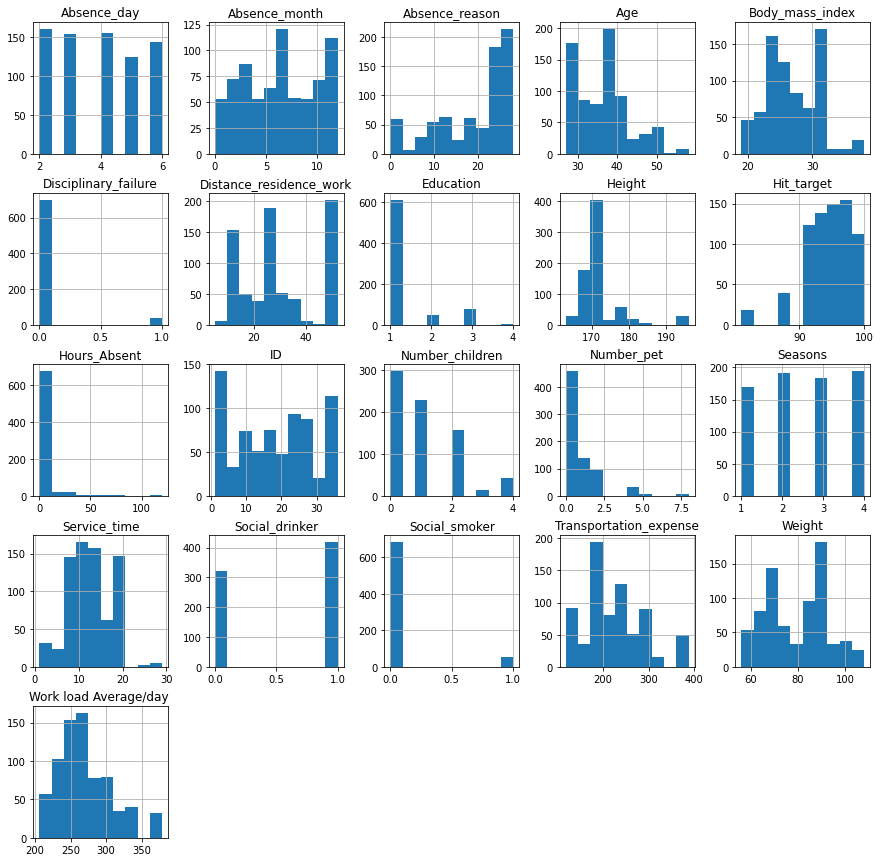

In [13]:
df.hist(figsize=(15,15))
plt.show()

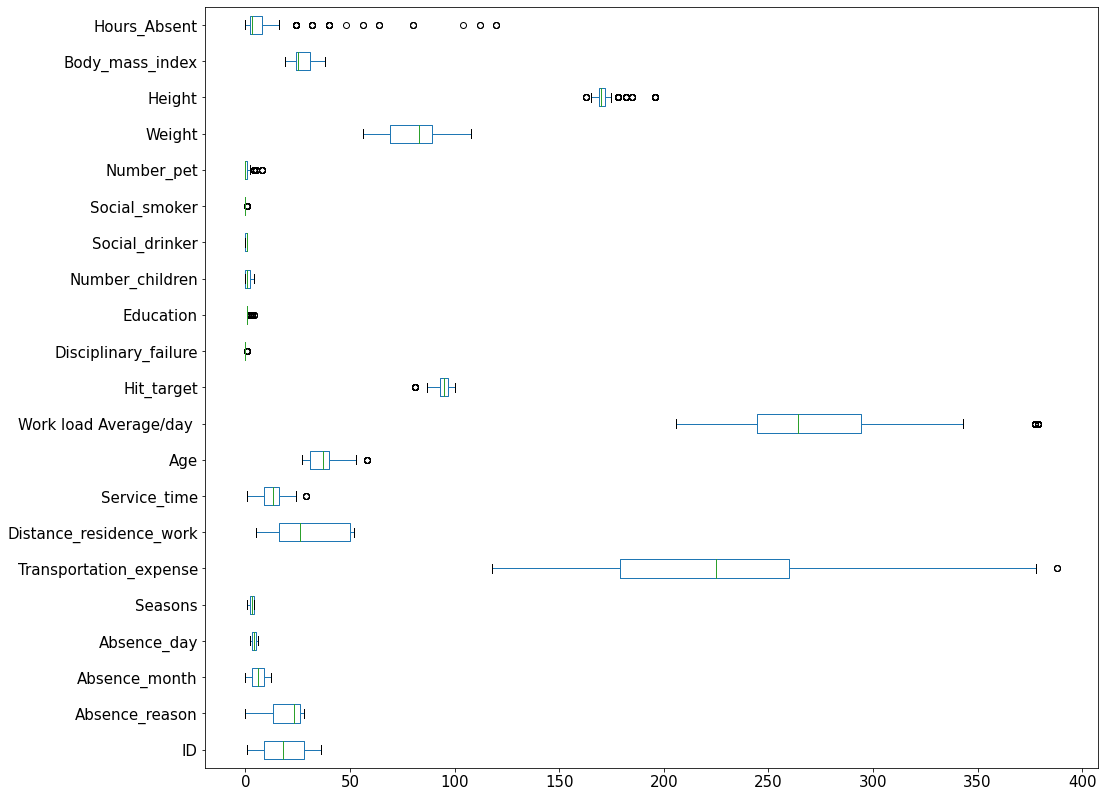

In [14]:
df.boxplot(grid=False, vert=False, figsize=(16, 14), fontsize=15)

In [15]:
df.corr().round(decimals=2)

,ID,Absence_reason,Absence_month,Absence_day,Seasons,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,...,Disciplinary_failure,Education,Number_children,Social_drinker,Social_smoker,Number_pet,Weight,Height,Body_mass_index,Hours_Absent
ID,1.00,-0.06,-0.00,0.03,0.10,-0.22,-0.49,-0.27,0.04,0.09,...,0.00,-0.04,0.00,-0.45,-0.01,-0.04,-0.25,0.08,-0.31,-0.02
Absence_reason,-0.06,1.00,-0.08,0.12,-0.12,-0.12,0.16,0.05,-0.08,-0.12,...,-0.55,-0.05,-0.06,0.07,-0.12,-0.06,-0.00,-0.08,0.04,-0.17
Absence_month,-0.00,-0.08,1.00,-0.01,0.41,0.14,-0.00,-0.06,-0.00,-0.17,...,0.11,-0.07,0.08,0.06,-0.04,0.05,0.02,-0.07,0.05,0.02
Absence_day,0.03,0.12,-0.01,1.00,0.05,0.03,0.12,0.02,0.00,0.02,...,-0.02,0.06,0.10,0.04,0.01,-0.03,-0.13,-0.08,-0.10,-0.12
Seasons,0.10,-0.12,0.41,0.05,1.00,0.04,-0.06,-0.01,-0.01,0.15,...,0.15,-0.00,0.05,-0.05,-0.05,0.01,-0.03,-0.03,-0.01,-0.01
Transportation_expense,-0.22,-0.12,0.14,0.03,0.04,1.00,0.26,-0.35,-0.23,0.01,...,0.11,-0.06,0.38,0.15,0.04,0.40,-0.21,-0.19,-0.14,0.03
Distance_residence_work,-0.49,0.16,-0.00,0.12,-0.06,0.26,1.00,0.13,-0.15,-0.07,...,-0.06,-0.26,0.05,0.45,-0.08,0.21,-0.05,-0.35,0.11,-0.09
Service_time,-0.27,0.05,-0.06,0.02,-0.01,-0.35,0.13,1.00,0.67,-0.00,...,-0.00,-0.21,-0.05,0.35,0.07,-0.44,0.46,-0.05,0.50,0.02
Age,0.04,-0.08,-0.00,0.00,-0.01,-0.23,-0.15,0.67,1.00,-0.04,...,0.10,-0.22,0.06,0.21,0.12,-0.23,0.42,-0.06,0.47,0.07
Work load Average/day,0.09,-0.12,-0.17,0.02,0.15,0.01,-0.07,-0.00,-0.04,1.00,...,0.03,-0.07,0.03,-0.03,0.03,0.01,-0.04,0.10,-0.09,0.02


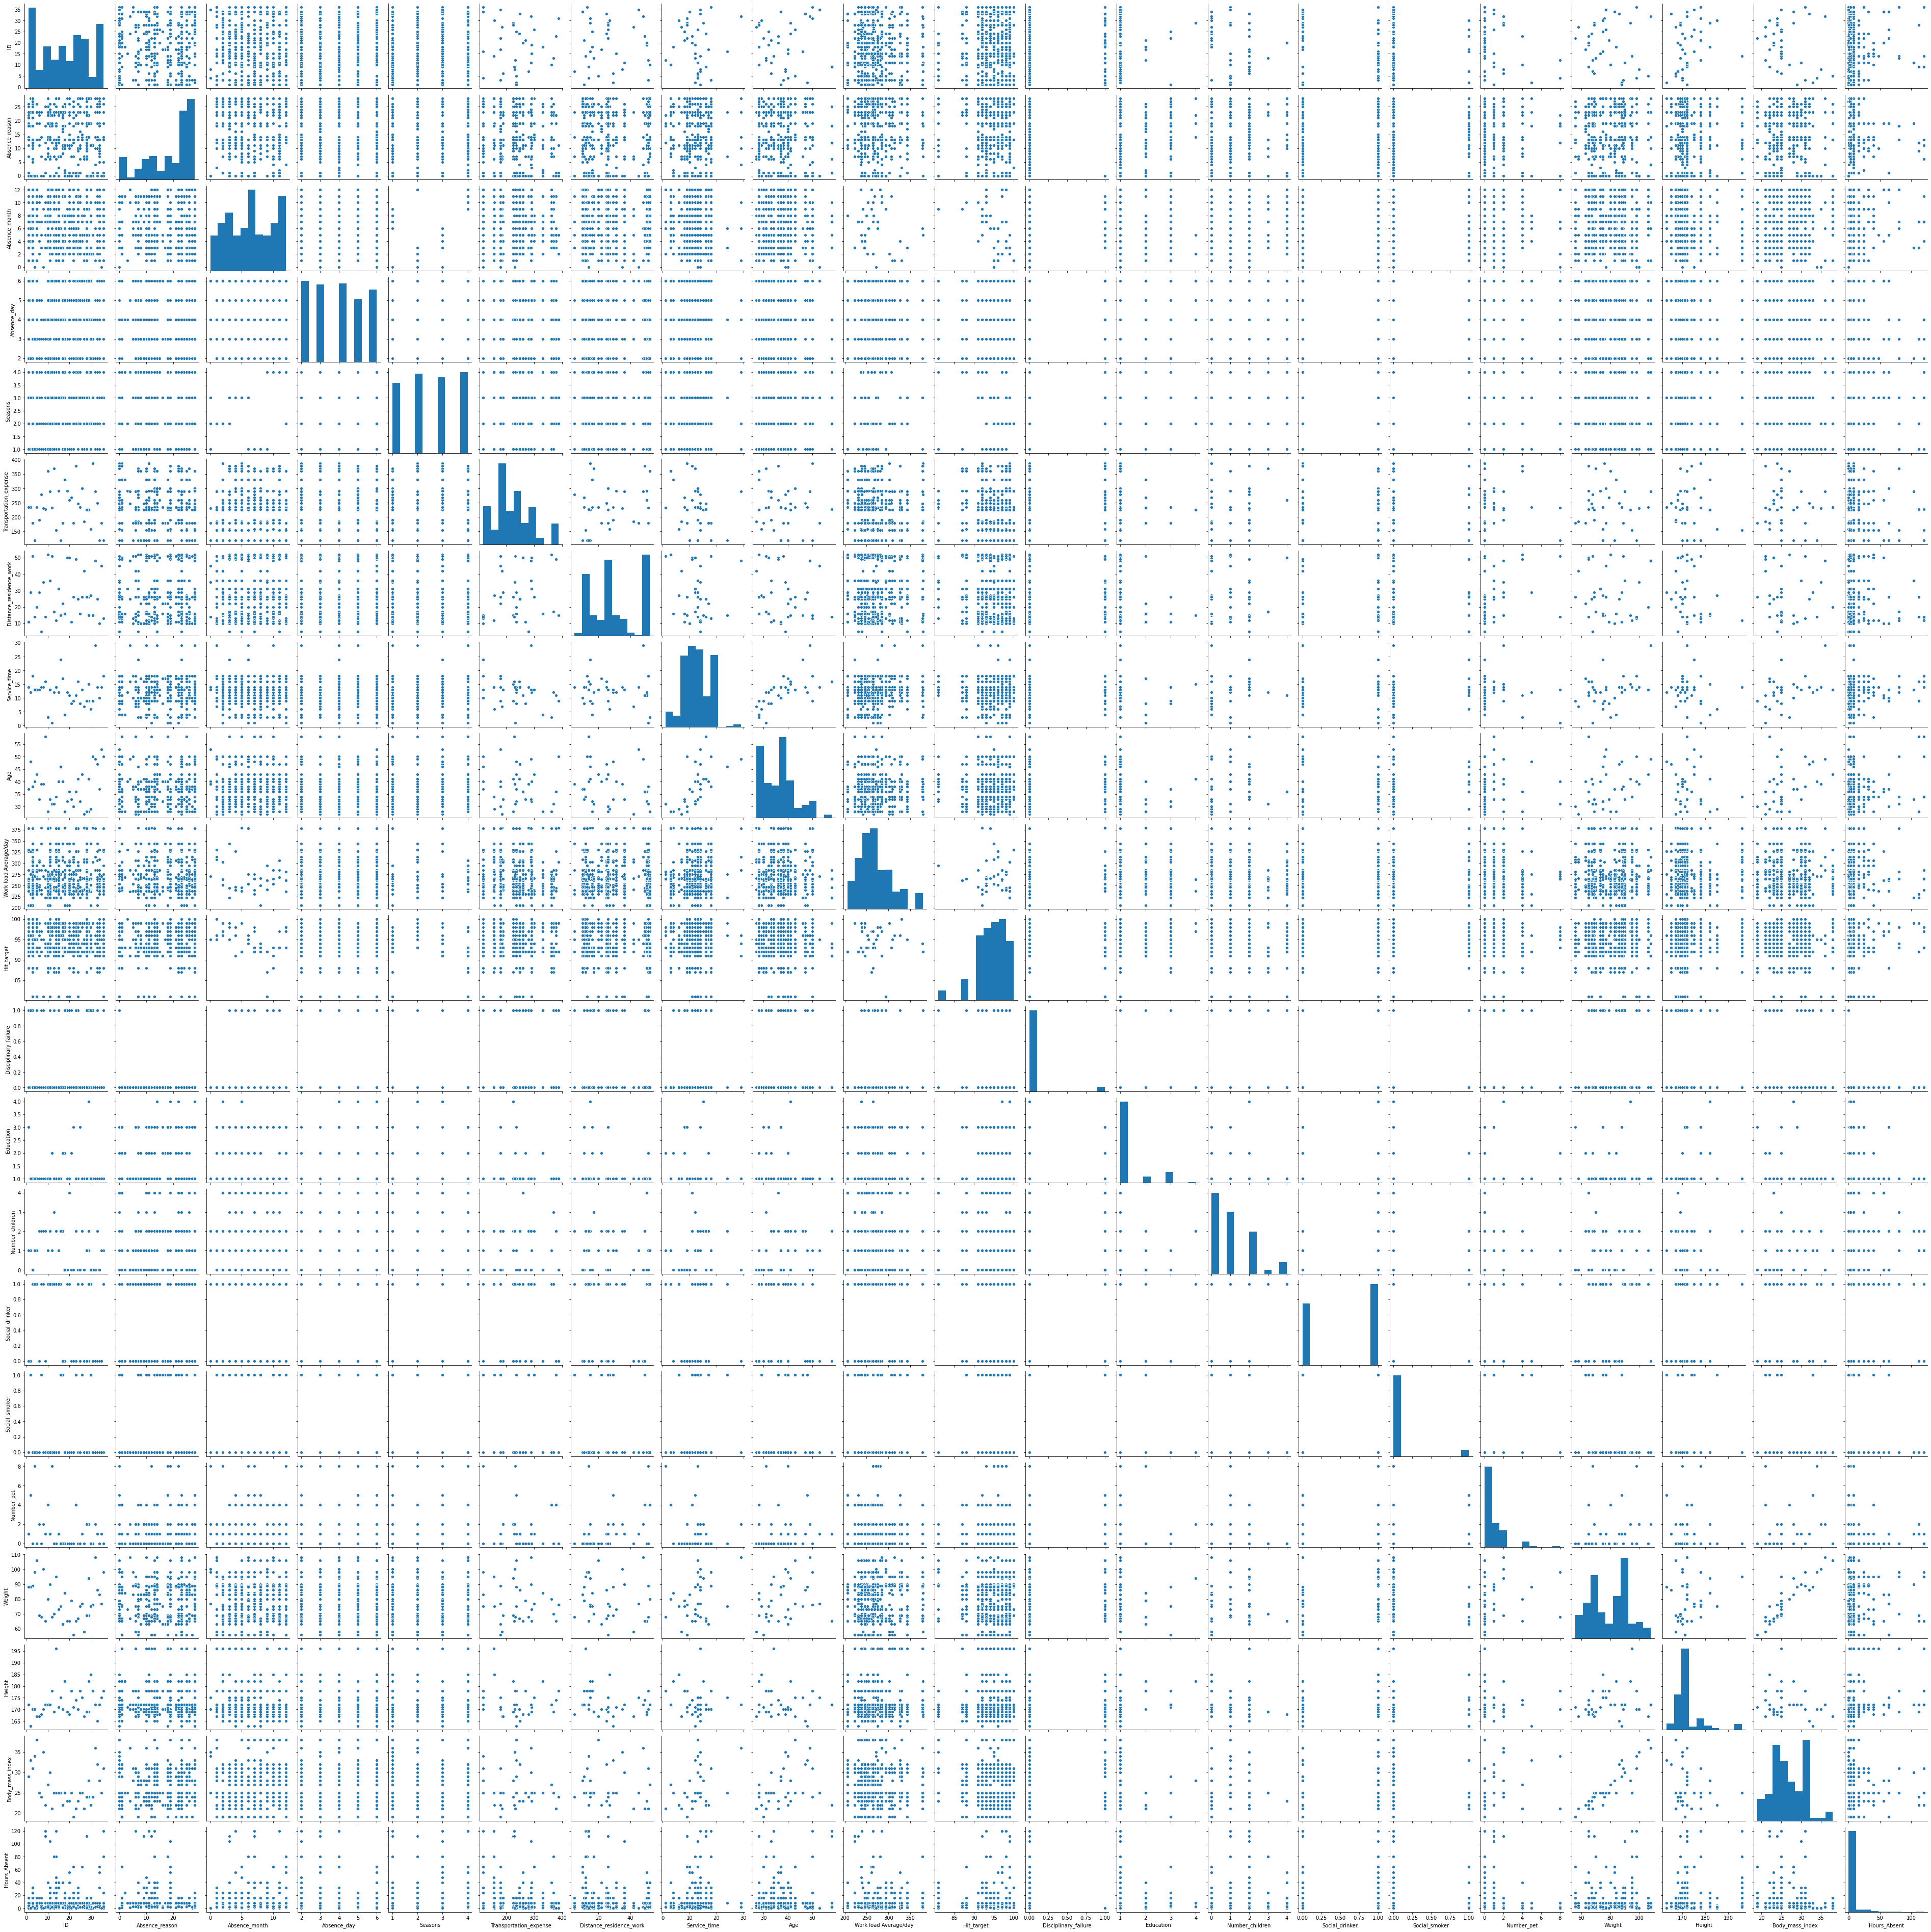

In [16]:
sns.pairplot(df)

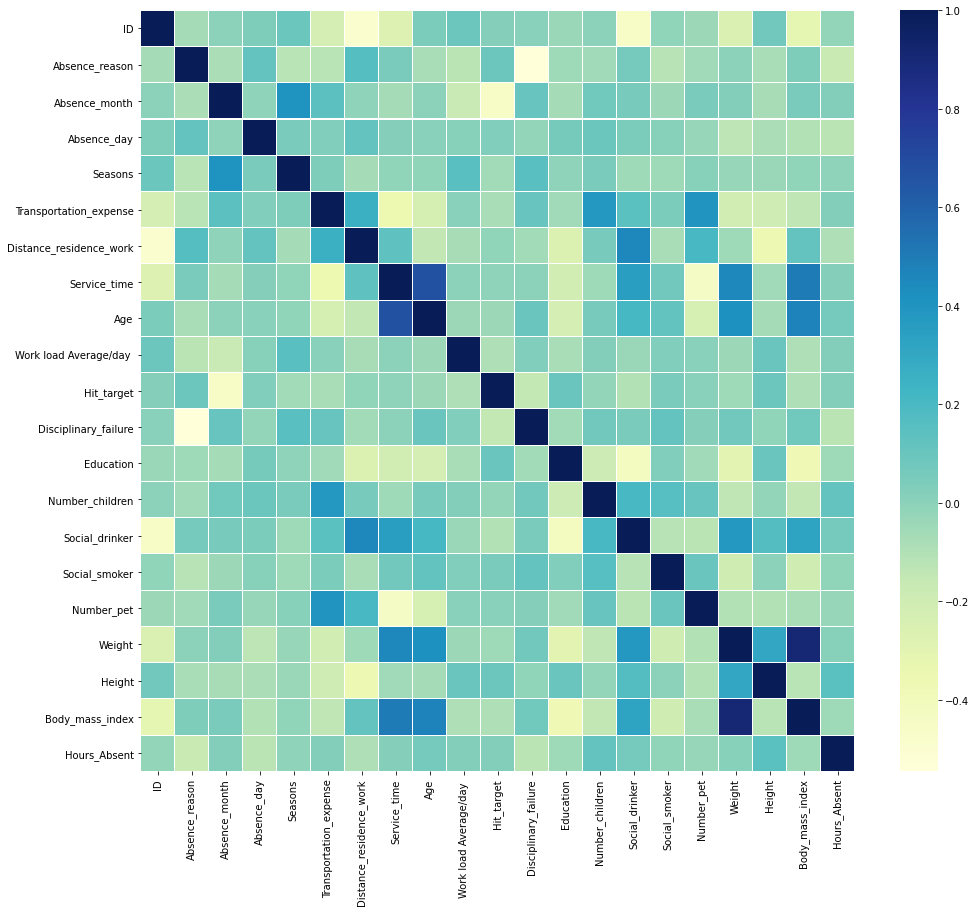

In [17]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu")

In [18]:
df.groupby(by='ID')['Hours_Absent'].sum()

ID
1     121
2      25
3     482
4       0
5     104
6      72
7      30
8       0
9     262
10    186
11    450
12     34
13    183
14    476
15    253
16     16
17    126
18    118
19      6
20    306
21     16
22    253
23     40
24    254
25     42
26     83
27     27
28    347
29     21
30     31
31     16
32     16
33     73
34    344
35      0
36    311
Name: Hours_Absent, dtype: int64

In [19]:
df.groupby(by='ID')['Absence_reason_description'].nunique()

ID
1     12
2      3
3     13
4      0
5      4
6      5
7      3
8      0
9      5
10    10
11    10
12     4
13     6
14    11
15     8
16     2
17    10
18     9
19     2
20    10
21     2
22     9
23     3
24    10
25     8
26     5
27     3
28    15
29     4
30     4
31     2
32     5
33     9
34    14
35     0
36     8
Name: Absence_reason_description, dtype: int64

In [8]:
# create flag for more (1) or less (0) days absent - day=8 hours 
df['Day_Absent']= np.where(df.Hours_Absent >= 8, 1, 0)
df['Day_Absent'].sum()

271

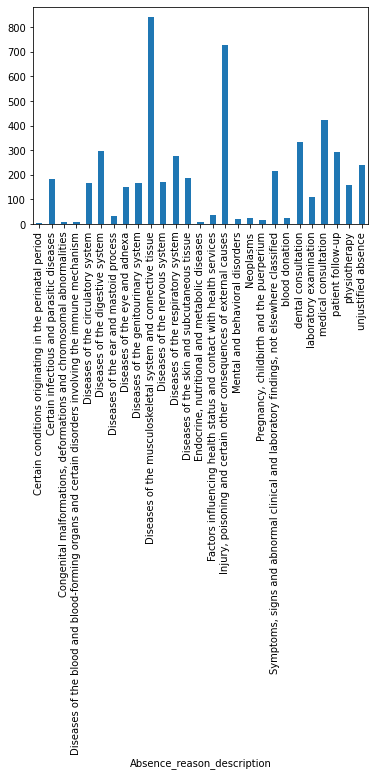

In [39]:
#total hours absent by reason 
Hours_Absent_by_Reason = df.groupby(by='Absence_reason_description')['Hours_Absent'].sum()
Hours_Absent_by_Reason.plot.bar()

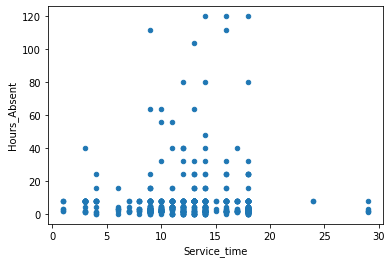

In [43]:
df.plot.scatter(x='Service_time', y='Hours_Absent')

In [55]:
df_pivot = df.pivot_table(index='ID', columns='Absence_reason_description', values='Hours_Absent')
df_pivot

Absence_reason_description,Certain conditions originating in the perinatal period,Certain infectious and parasitic diseases,"Congenital malformations, deformations and chromosomal abnormalities",Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,Diseases of the circulatory system,Diseases of the digestive system,Diseases of the ear and mastoid process,Diseases of the eye and adnexa,Diseases of the genitourinary system,Diseases of the musculoskeletal system and connective tissue,...,Neoplasms,"Pregnancy, childbirth and the puerperium","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",blood donation,dental consultation,laboratory examination,medical consultation,patient follow-up,physiotherapy,unjustified absence
ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,8.000000,NaN,NaN,NaN,4.000000,NaN,3.00,4.000000,8.333333,...,NaN,NaN,1.0,NaN,NaN,2.000000,3.000000,8.000000,NaN,6.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,NaN,8.000000,NaN,1.000000,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,4.142857,NaN,NaN,NaN,13.100000,...,NaN,NaN,8.0,NaN,3.884615,4.000000,2.842105,NaN,2.552632,8.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,7.555556
6,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,10.666667,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,12.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
9,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,NaN,NaN,2.500000,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,8.00,4.000000,40.000000,...,NaN,NaN,NaN,NaN,2.000000,7.000000,1.250000,8.000000,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,8.000000,14.000000,...,NaN,NaN,8.0,8.0,NaN,NaN,3.200000,6.333333,NaN,7.333333


In [56]:
df_pivot.corr()

Absence_reason_description,Certain conditions originating in the perinatal period,Certain infectious and parasitic diseases,"Congenital malformations, deformations and chromosomal abnormalities",Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,Diseases of the circulatory system,Diseases of the digestive system,Diseases of the ear and mastoid process,Diseases of the eye and adnexa,Diseases of the genitourinary system,Diseases of the musculoskeletal system and connective tissue,...,Neoplasms,"Pregnancy, childbirth and the puerperium","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",blood donation,dental consultation,laboratory examination,medical consultation,patient follow-up,physiotherapy,unjustified absence
Absence_reason_description,,,,,,,,,,,,,,,,,,,,,
Certain conditions originating in the perinatal period,1.0,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN
Certain infectious and parasitic diseases,NaN,1.000000,NaN,NaN,NaN,0.998250,NaN,1.000000,NaN,-0.286191,...,NaN,NaN,0.286270,NaN,-0.192578,-0.157831,0.018350,NaN,NaN,NaN
"Congenital malformations, deformations and chromosomal abnormalities",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diseases of the circulatory system,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,-1.000000,-0.234146,...,NaN,NaN,-1.000000,NaN,-0.500000,-1.000000,-0.454782,NaN,NaN,1.000000
Diseases of the digestive system,-1.0,0.998250,NaN,NaN,1.000000,1.000000,1.000000,0.799227,-1.000000,0.446496,...,NaN,NaN,0.926698,NaN,-0.368033,-0.139123,-0.250407,-0.159601,-0.535156,0.822769
Diseases of the ear and mastoid process,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,...,NaN,NaN,-1.000000,NaN,-1.000000,0.644341,-0.933332,NaN,NaN,NaN
Diseases of the eye and adnexa,NaN,1.000000,NaN,NaN,1.000000,0.799227,1.000000,1.000000,0.831104,0.591105,...,NaN,NaN,0.417543,NaN,-0.310647,0.546104,0.145524,-0.354701,0.596040,0.894427
Diseases of the genitourinary system,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,0.831104,1.000000,0.457215,...,NaN,NaN,0.891042,NaN,-0.212903,0.426105,0.443185,0.051723,NaN,0.943987


unjustified absence


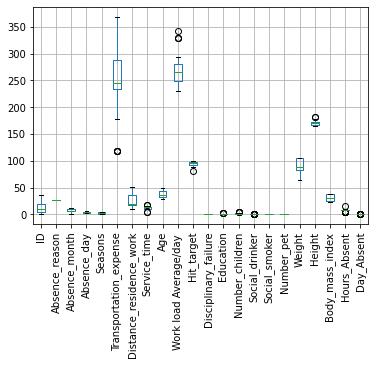

nan


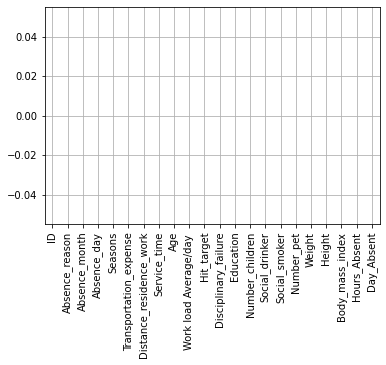

medical consultation


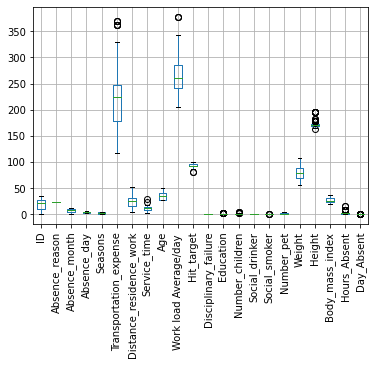

Diseases of the eye and adnexa


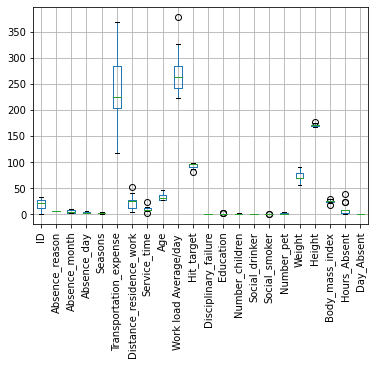

patient follow-up


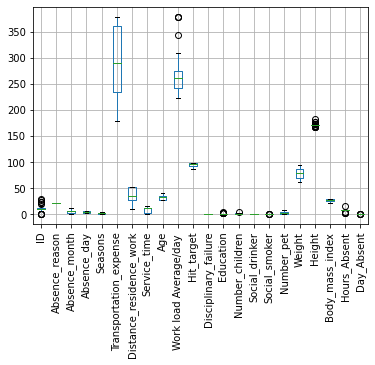

Injury, poisoning and certain other consequences of external causes


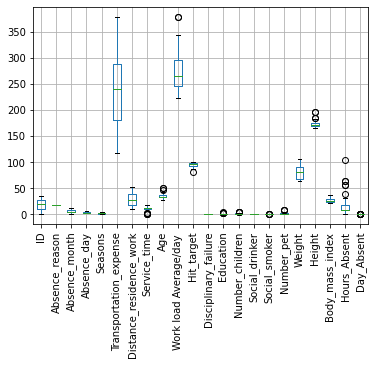

Certain infectious and parasitic diseases


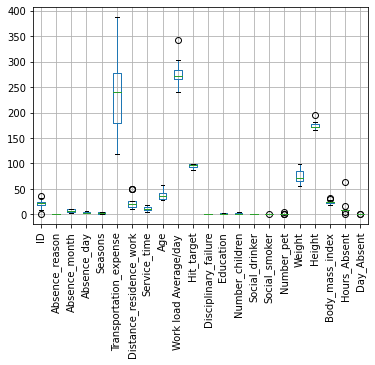

Diseases of the digestive system


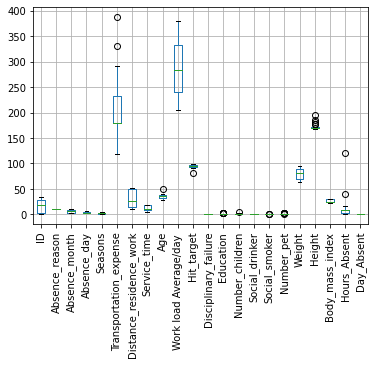

Diseases of the genitourinary system


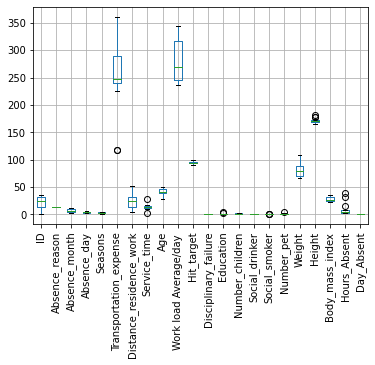

Factors influencing health status and contact with health services


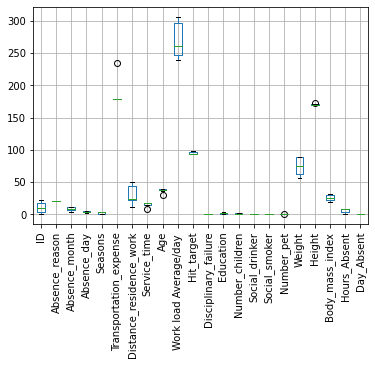

Diseases of the respiratory system


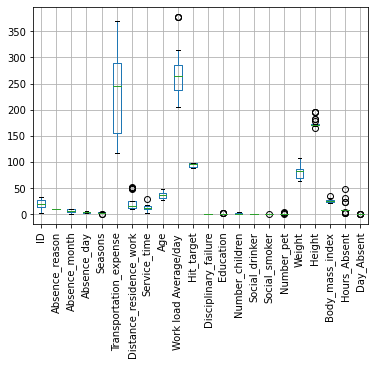

Diseases of the musculoskeletal system and connective tissue


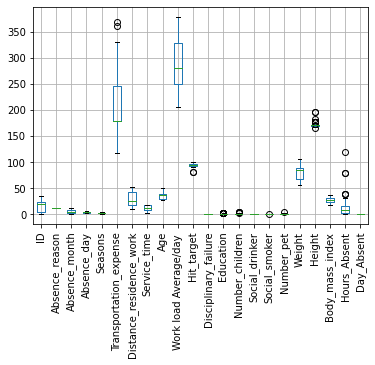

dental consultation


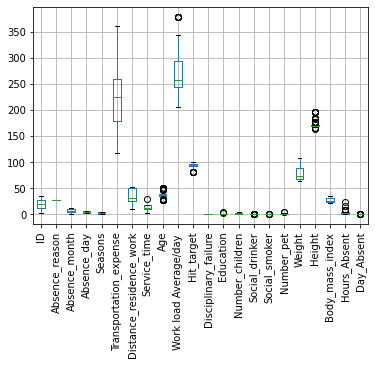

Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified


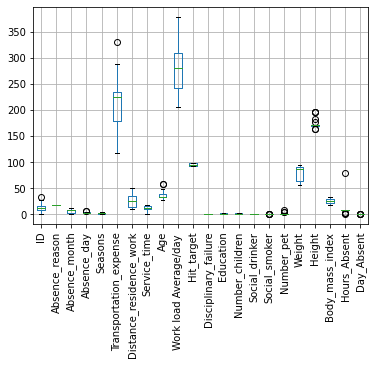

laboratory examination


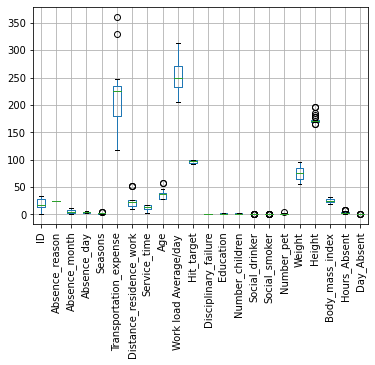

blood donation


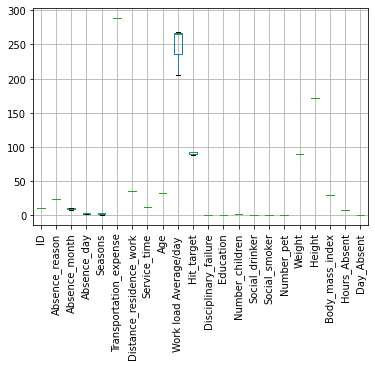

Diseases of the nervous system


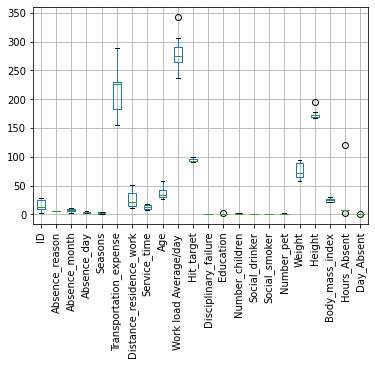

physiotherapy


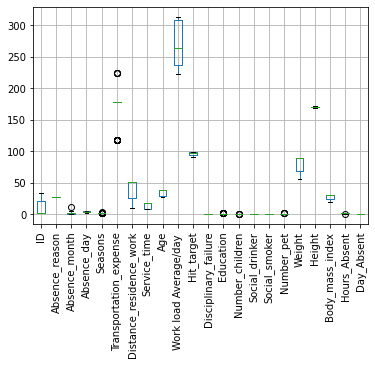

Congenital malformations, deformations and chromosomal abnormalities


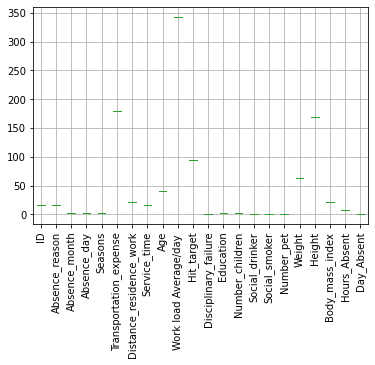

Diseases of the ear and mastoid process


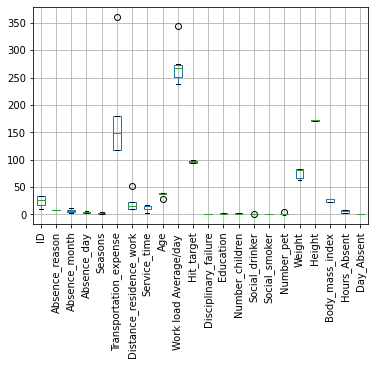

Diseases of the skin and subcutaneous tissue


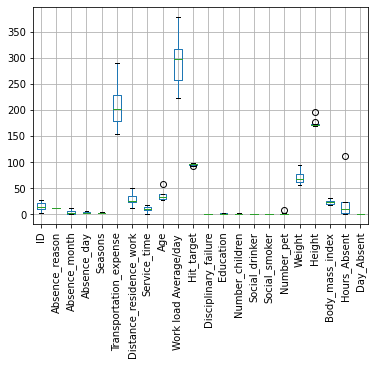

Mental and behavioral disorders


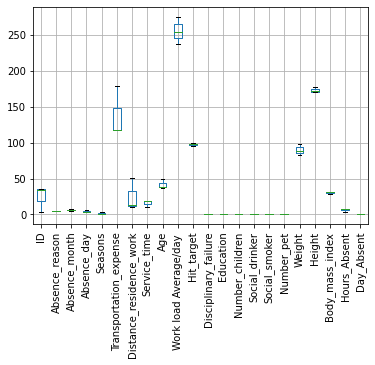

Diseases of the circulatory system


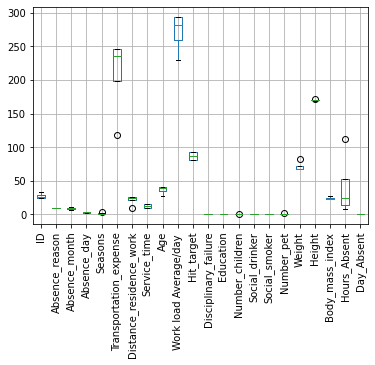

Pregnancy, childbirth and the puerperium


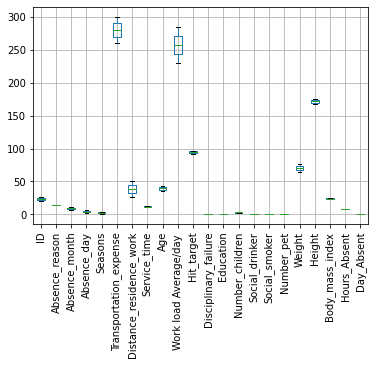

Endocrine, nutritional and metabolic diseases


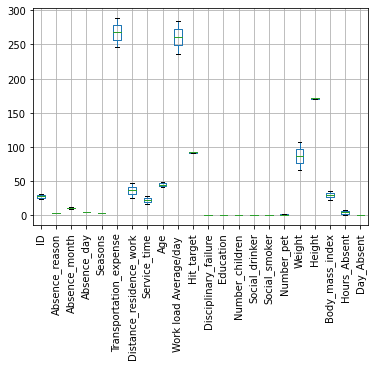

Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism


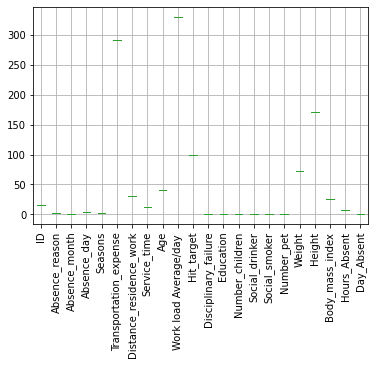

Neoplasms


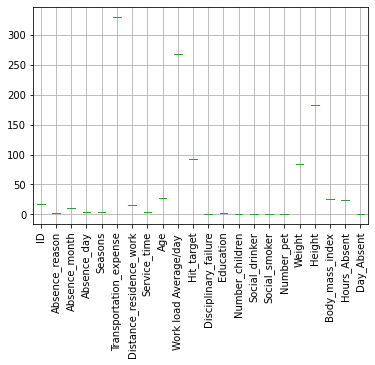

Certain conditions originating in the perinatal period


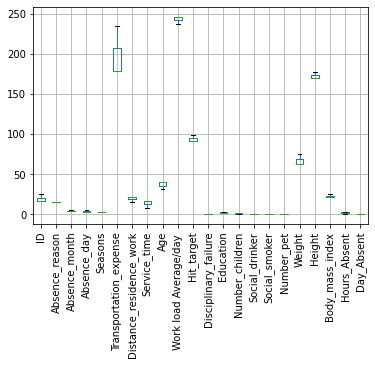

In [65]:
for reason in df.Absence_reason_description.unique():
    df[df['Absence_reason_description'] == reason].boxplot(rot=90)
    print(reason)
    plt.show()

ID


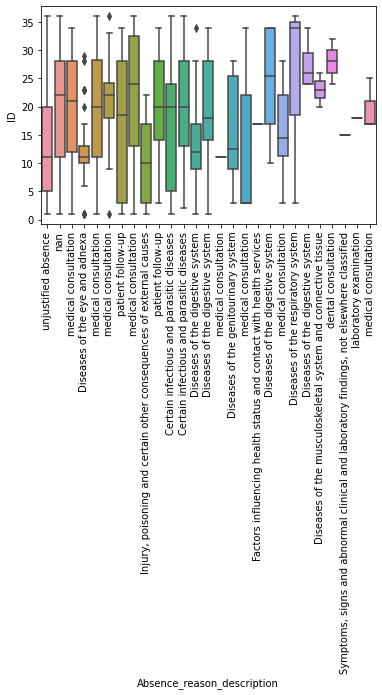

Absence_reason


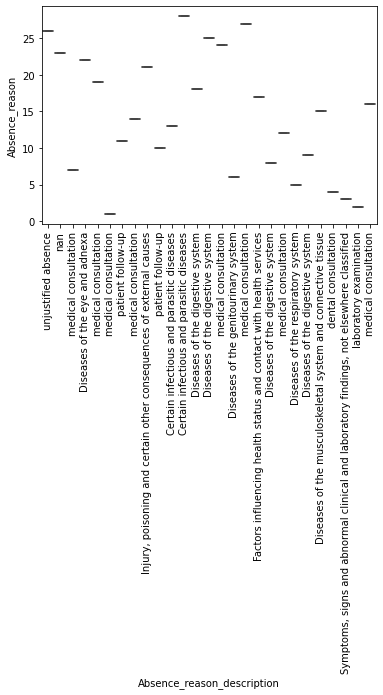

Absence_month


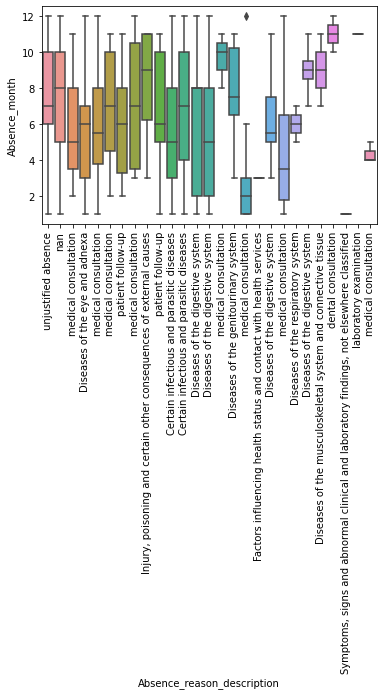

Absence_day


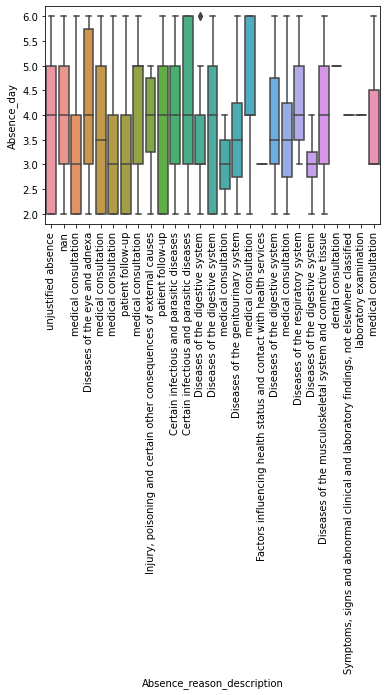

Seasons


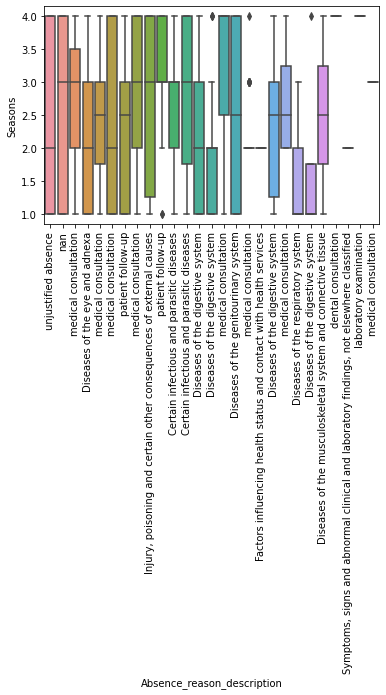

Transportation_expense


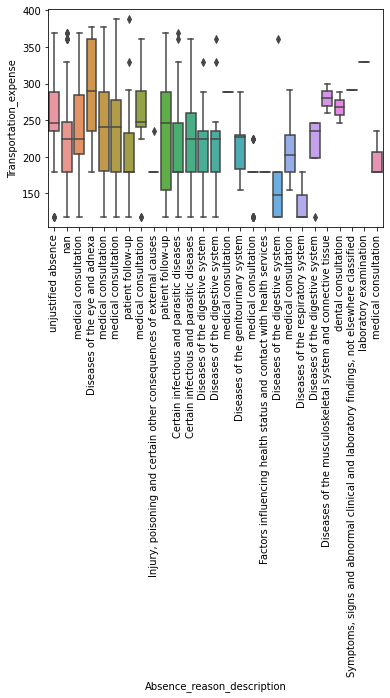

Distance_residence_work


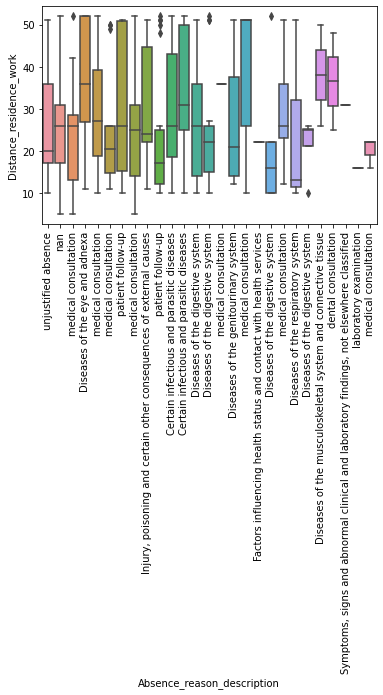

Service_time


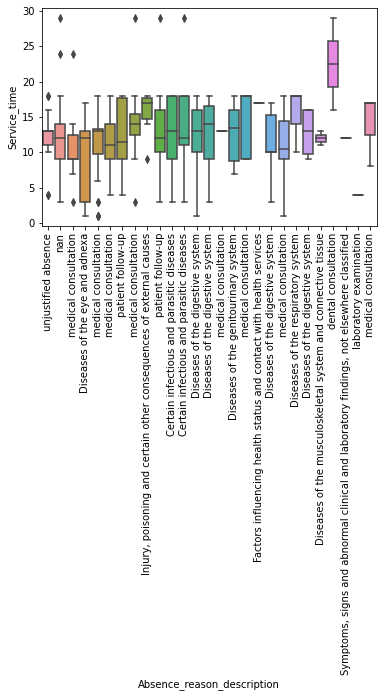

Age


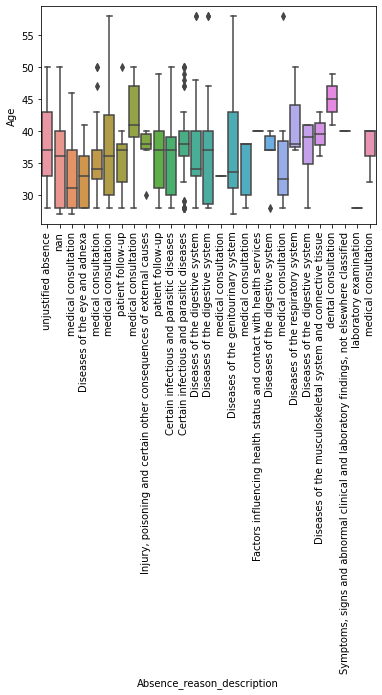

Work load Average/day 


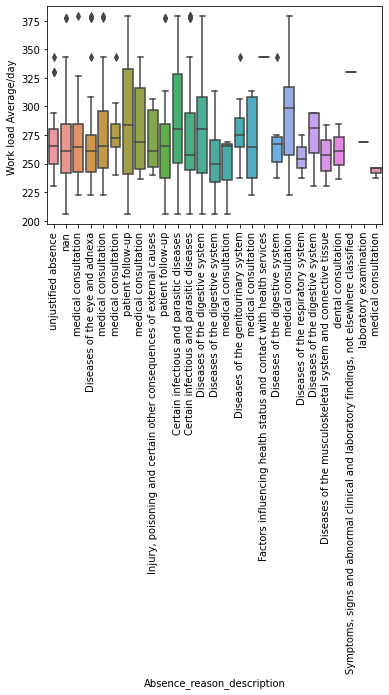

Hit_target


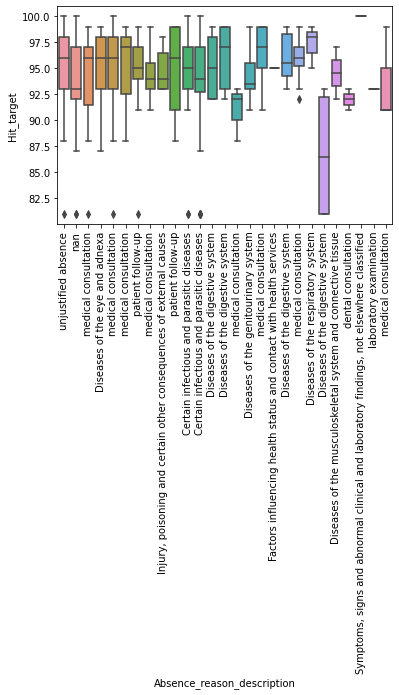

Disciplinary_failure


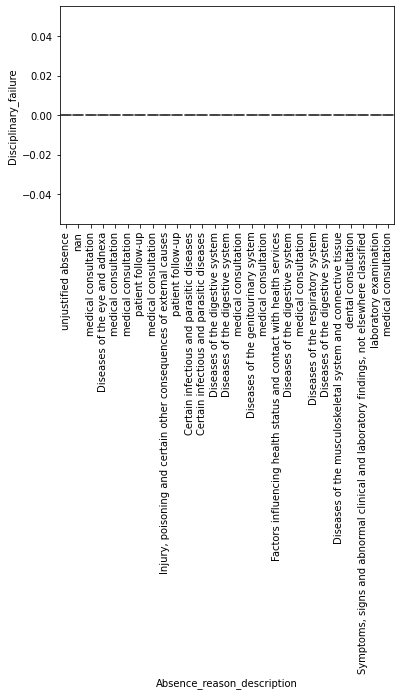

Education


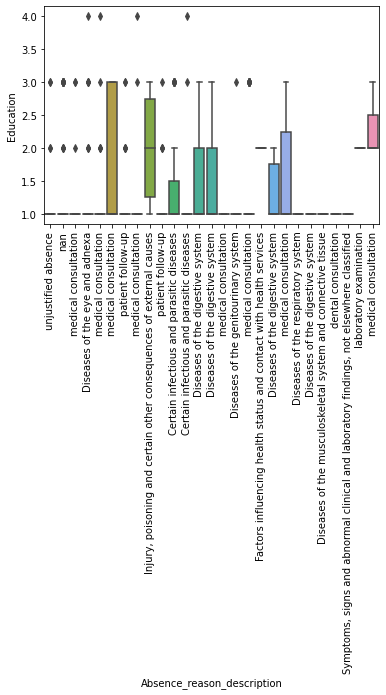

Number_children


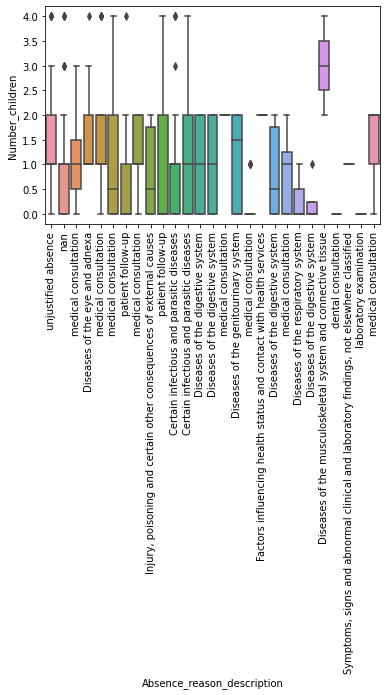

Social_drinker


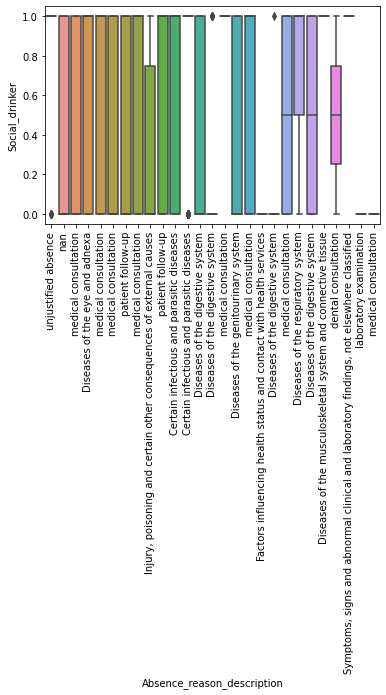

Social_smoker


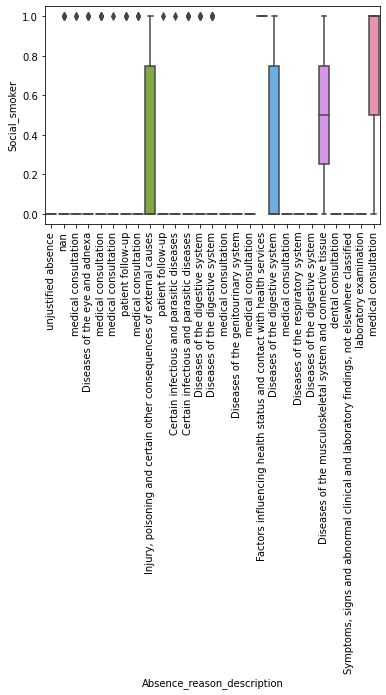

Number_pet


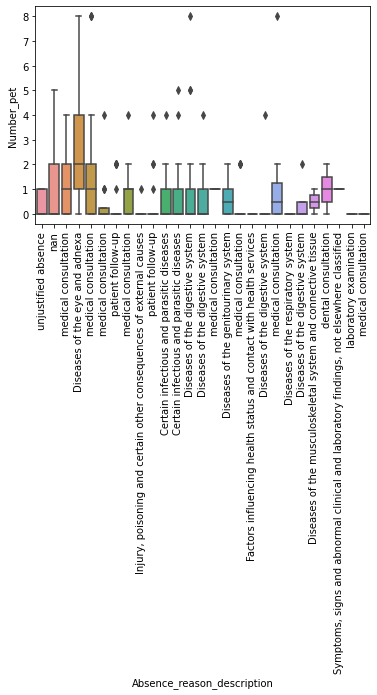

Weight


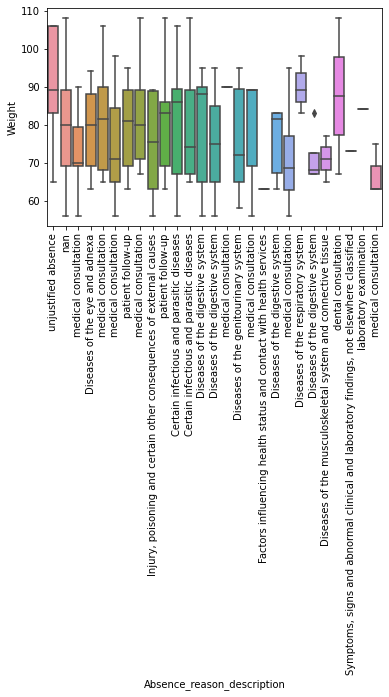

Height


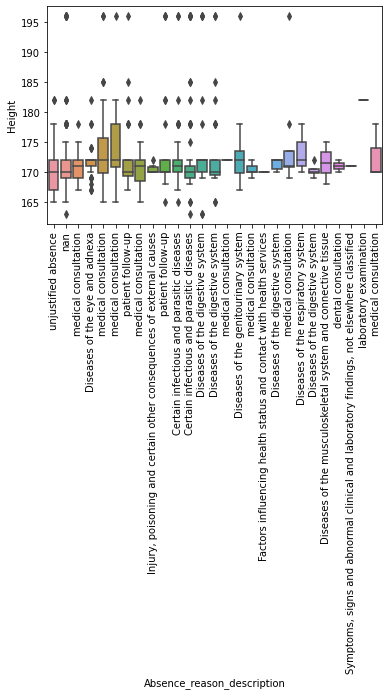

Body_mass_index


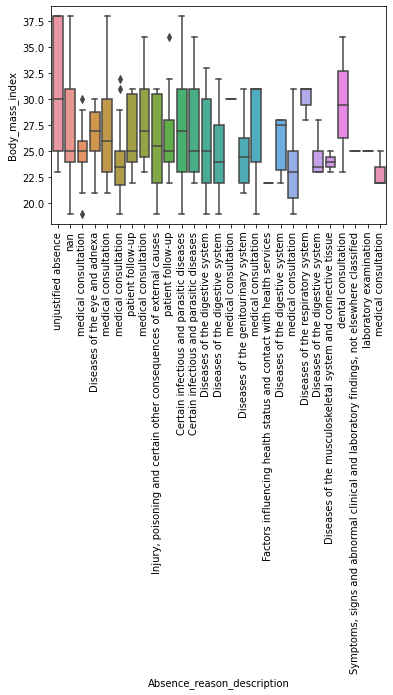

Hours_Absent


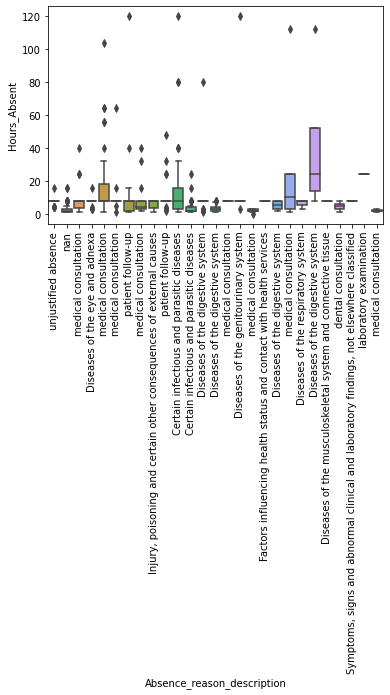

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [74]:
for column in df.columns:
    p = sns.boxplot(data=df, x='Absence_reason_description', y=column)
    print(column)
    p.set_xticklabels(labels=df.Absence_reason_description , rotation=90)    
    plt.show()

In [26]:
#create dataframe of employee demographics
df_employee = df.drop_duplicates(subset='ID', keep='first', ignore_index=True)
df_employee.sort_values(by=['ID'], inplace=True, ignore_index=True)
df_employee.drop(['Absence_reason', 'Absence_month', 'Absence_day', 'Seasons', 'Hours_Absent', 'Absence_reason_description', 'Absence_month_description', 'Absence_day_description', 'Seasons_description', 'Day_Absent'], axis=1, inplace=True)
h = df.groupby(by='ID')['Hours_Absent'].sum()
df_employee['Total_Hours_Absent']=df_employee['ID'].map(h)
r = df.groupby(by='ID')['Absence_reason_description'].nunique()
df_employee['Number_Reasons_Absent']=df_employee['ID'].map(r)
df_employee

/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,ID,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,Hit_target,Disciplinary_failure,Education,Number_children,Social_drinker,Social_smoker,Number_pet,Weight,Height,Body_mass_index,Education_description,Total_Hours_Absent,Number_Reasons_Absent
0,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,postgraduate,121,12
1,2,235,29,12,48,205.917,92,0,1,1,0,1,5,88,163,33,high school,25,3
2,3,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,high school,482,13
3,4,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,high school,0,0
4,5,235,20,13,43,241.476,92,0,1,1,1,0,0,106,167,38,high school,104,4
5,6,189,29,13,33,239.554,97,0,1,2,0,0,2,69,167,25,high school,72,5
6,7,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,high school,30,3
7,8,231,35,14,39,294.217,81,1,1,2,1,0,2,100,170,35,high school,0,0
8,9,228,14,16,58,265.615,94,0,1,2,0,0,1,65,172,22,high school,262,5
9,10,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,high school,186,10


In [27]:
# save dataframes 
df.to_csv('Absenteeism_at_work_df.csv')
df_employee.to_csv('Absenteeism_at_work_df_employee.csv')